# Homework 2
### Grant White

In [1]:
import numpy as np
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 130

### 1)

In [2]:
def plot_sol(alpha, beta, fun, N, show_plot=True):
    #initialize
    x = np.linspace(0, 1, N+1)
    one_diag = np.ones(N-2)
    A = N**2 * (-2*np.eye(N-1) + np.diag(one_diag, 1) + np.diag(one_diag, -1))
    F = fun(x[1:-1])
    F[0] -= N**2 * alpha
    F[-1] -= N**2 * beta
    
    #solve
    U = solve(A, F)
    U = np.concatenate(([alpha], U, [beta]))
    
    if show_plot:
        #plot
        plt.plot(x, U)
        plt.title('N = {}'.format(N))
        plt.xlabel('$x_j$')
        plt.ylabel('$v_j$')
        plt.show()
    
    return U

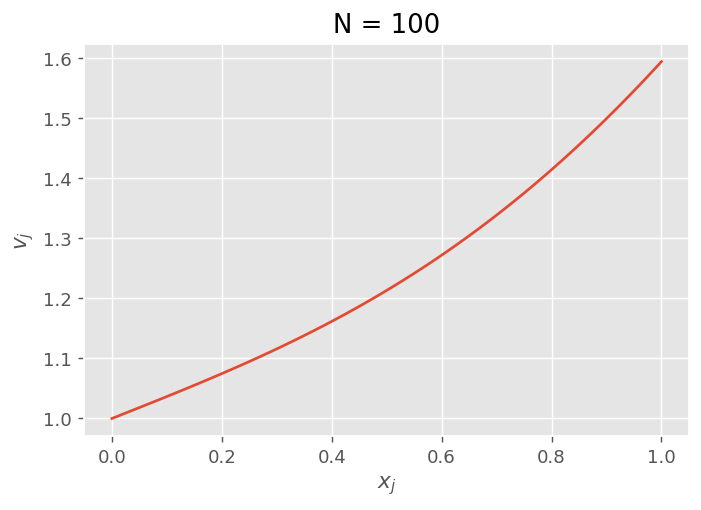

In [3]:
f = lambda x: np.sin(np.pi*x/2)
U = plot_sol(1, 2 - 4/np.pi**2, f, 100)

### 2)

$ u''(x) = f(x) = sin(\pi x / 2), \; \alpha = 1, \; \beta = 2 - 4/\pi^2 $

$ u'(x) = -(2/\pi) cos(\pi x / 2) + c_1 $

$ u(x) = -(4/\pi^2) sin(\pi x / 2) + c_1 x + c_2 $

$ u(0) = \alpha $

$ c_2 = 1 $

$ u(1) = \beta $

$ 2 - 4/\pi^2 = -(4/\pi^2) sin(\pi / 2) + c_1 + 1 
    = -4/\pi^2 + c_1 + 1 $

$ c_1 = 1 $

$ u(x) = -(4/\pi^2) sin(\pi x / 2) + x + 1 $

### 3)

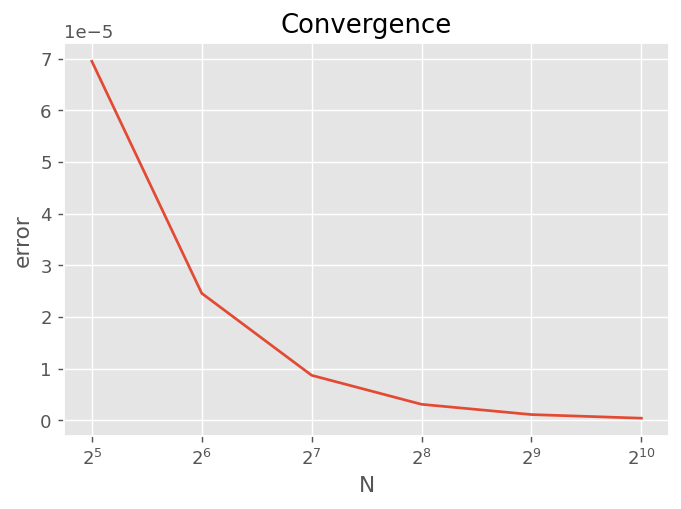

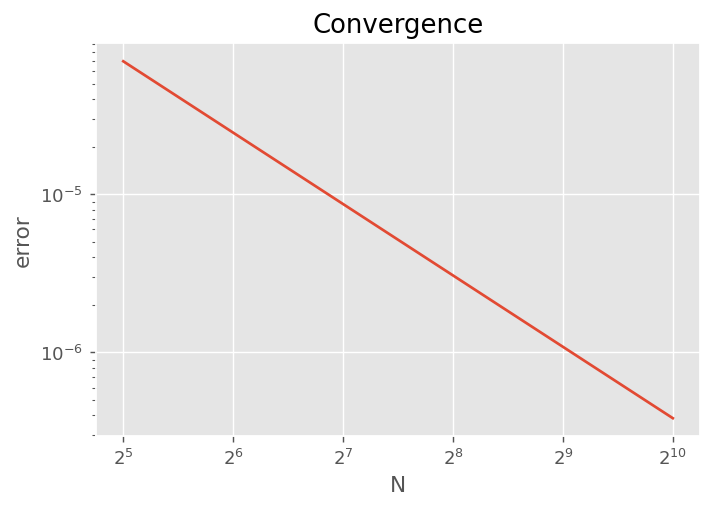

In [4]:
#initialize
N = 2**np.arange(5, 11)
f = lambda x: np.sin(np.pi*x/2)
true_func = lambda x: -4 / np.pi**2 * np.sin(np.pi * x / 2) + x + 1
error = []

#get error
for n in N:
    #actual
    x = np.linspace(0, 1, n+1)
    u = true_func(x)
    
    #estimate
    U = plot_sol(1, 2 - 4/np.pi**2, f, n, False)
    
    #error
    error.append(norm(U - u, ord=2))
    
#plot
plt.plot(N, error)
plt.xscale('log', base=2)
plt.title('Convergence')
plt.xlabel('N')
plt.ylabel('error')
plt.show()

plt.plot(N, error)
plt.yscale('log', base=10)
plt.xscale('log', base=2)
plt.title('Convergence')
plt.xlabel('N')
plt.ylabel('error')
plt.show()

It appears to be of order $h^2$.